# Импорт и настройка

In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np
from numpy import percentile
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings

import os

warnings.filterwarnings("ignore")

In [2]:
RANDOM_SEED = 42
!pip freeze > requirements.txt


In [3]:
# этот блок используется на kaggle
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# PATH_to_file = '/kaggle/input/sf-dst-scoring/'

# этот блок используется на локальной машине
PATH_to_file = ''

# Данные

In [4]:
# Предварительная загрузка и просмотр

df = pd.read_csv(PATH_to_file+'train.csv')
df.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [5]:
# Импортируем данные

train = pd.read_csv(PATH_to_file + 'train.csv')
test= pd.read_csv(PATH_to_file + 'test.csv')

display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

None

In [6]:
display("train: shape" + str(train.shape), train.columns)
display("test: shape" +str(test.shape), test.columns)

# Видим, что в тестовой выборке нет данных признака "default", что логично.

'train: shape(73799, 19)'

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default'],
      dtype='object')

'test: shape(36349, 18)'

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport'],
      dtype='object')

In [7]:
display(train.isna().sum())
display(test.isna().sum())

# Мы видим, что и в тренировочной и в тестовом примере отсутствуют значения в признаке "education".

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

In [8]:
# Делаем пометку, где тренировочная выборка, где тестовая
train['Train'] = 1
test['Train'] = 0

#Заранее сохраняем значения client_id для предсказания тестовой выборки
id_test = test['client_id']

bank = train.append(test, sort=False).reset_index(drop=True) # объединяем датафреймы
print(f'bank.shape = {bank.shape}')
display(bank.isna().sum())

bank.shape = (110148, 20)


client_id               0
app_date                0
education             478
sex                     0
age                     0
car                     0
car_type                0
decline_app_cnt         0
good_work               0
score_bki               0
bki_request_cnt         0
region_rating           0
home_address            0
work_address            0
income                  0
sna                     0
first_time              0
foreign_passport        0
default             36349
Train                   0
dtype: int64

# Преобразование и чистка данных

bank.shape = (110148, 19)


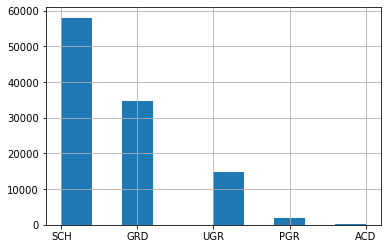

In [9]:
bank['education'].hist()
# В датафрейме только признаке "education" есть пустые значения. 
# Количетсво пустых значений существенно меньше общего количества строк в таблице, 
# в данном признаке сильно превалирует значение "SCH", мы меняем значение на "SCH".

bank['education'].fillna('SCH', inplace=True)

# Замечание: нам не нужен признак "client_id", мы удалим его
bank.drop('client_id', axis=1, inplace=True)
print(f'bank.shape = {bank.shape}')

In [10]:
# Мы видим, что в отличие от всех других признаков, признак "app_date" в формате, не пригодном для дульнейшей работы.

bank['app_date'] = pd.to_datetime(bank['app_date'], format='%d%b%Y')

Разделение на категории

In [11]:
# Нам необходимо разделить признаки на категории.
display(bank.head(3))
display(bank.nunique())

# На основании представленной информации разделим признаки следующим образом
num_features = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'region_rating', 'income']
cat_features = ['education', 'home_address', 'work_address', 'sna', 'first_time']
bin_features = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']
date_features = ['app_date']

# Отдельно остается поле "default" - целевая переменная, которую необходимо бужет предсказать

,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,Train
0,2014-02-01,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0.0,1
1,2014-03-12,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0.0,1
2,2014-02-01,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0.0,1


app_date               120
education                5
sex                      2
age                     52
car                      2
car_type                 2
decline_app_cnt         24
good_work                2
score_bki           102618
bki_request_cnt         40
region_rating            7
home_address             3
work_address             3
income                1207
sna                      4
first_time               4
foreign_passport         2
default                  2
Train                    2
dtype: int64

Создание нового признака

In [12]:
# Так как мы не можем работать с признаком "app_date" напрямую, создадим новый признак:
# признак 'app_days_now', которые представляет собой разницу в днях от некоторого дня, 
# например от последнего указанного дня +30 дней (это первый весомый период по учету дефолта)

max_date = bank['app_date'].max().date() + timedelta(days=30)
bank['app_days_now'] = bank['app_date'].apply(lambda x: (max_date - x.date()).days)

# Добавим данные переменные в числовые признаки
num_features.extend(['app_days_now'])

# Корреляция и распределение признаков

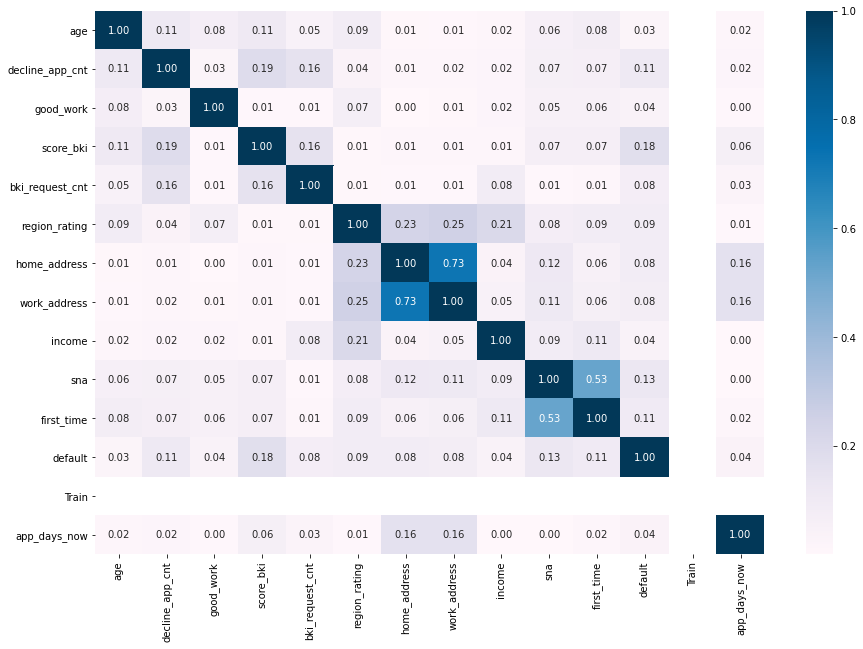

In [13]:
# Рассмотрим корреляцию признаков

plt.figure(figsize=(15, 10))
sns.heatmap(bank[bank['Train']==1].corr().abs(), annot=True, fmt='.2f', cmap='PuBu')

# Выводы: так как максимальная корреляция чуть превосходит 0.7, то никакие признаки удалять не будем

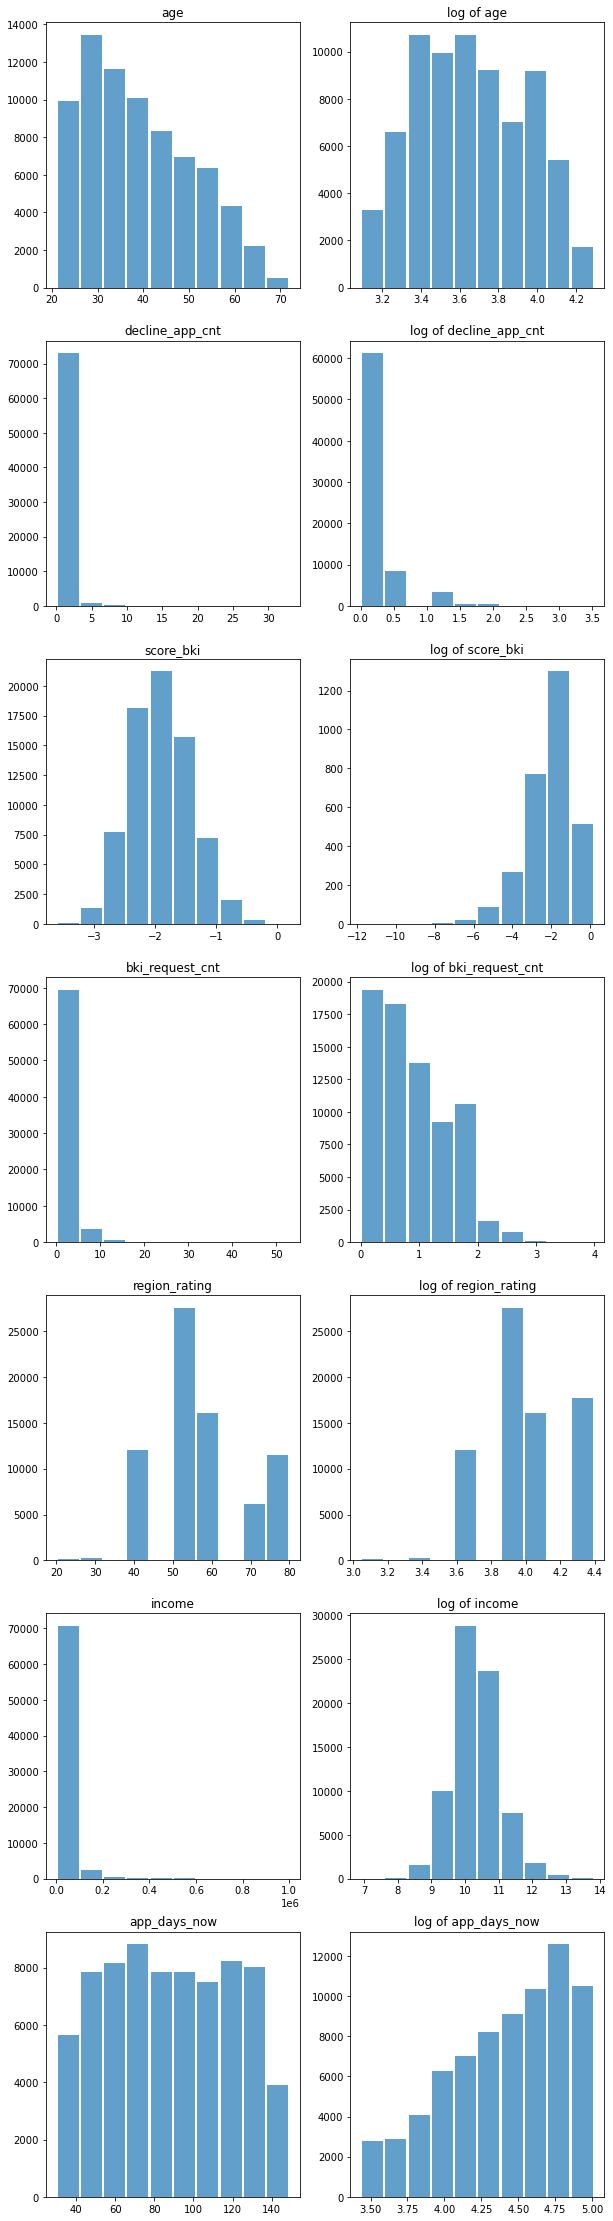

In [14]:
# Рассмотрим как распределены числовые признаки

fig, ax = plt.subplots(len(num_features), 2, figsize=(10, 40))


#Изобразим графики значений и логарима значений

for x in range(len(num_features)):
    new_series_log = np.log(bank[bank['Train']==1][num_features[x]] + 1)
    
    ax[x, 0].hist(bank[bank['Train']==1][num_features[x]], rwidth=0.9, alpha=0.7)
    ax[x, 0].set_title(num_features[x])
    
    ax[x, 1].hist(new_series_log, rwidth=0.9, alpha=0.7)
    ax[x, 1].set_title('log of ' + num_features[x])
     

Преобразование числовых признаков

In [15]:
# На основании графиков можно сделать следующие преобразования:

bank['age'] = np.log(bank['age'] + 1)
bank['decline_app_cnt'] = np.log(bank['decline_app_cnt'] + 1)
bank['bki_request_cnt'] = np.log(bank['bki_request_cnt'] + 1)
bank['income'] = np.log(bank['income'] + 1)

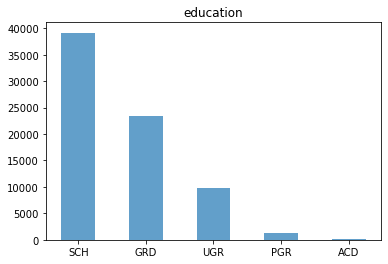

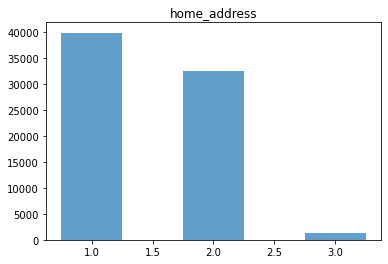

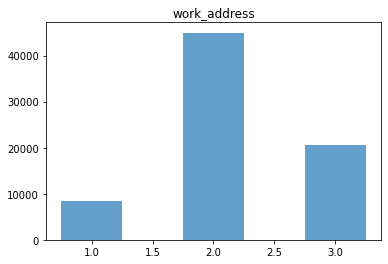

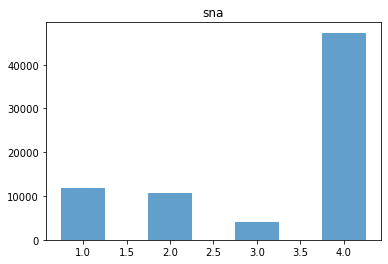

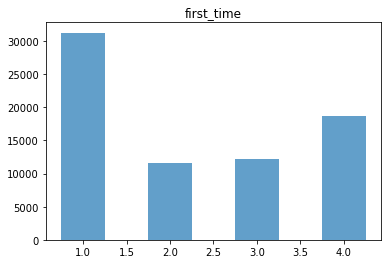

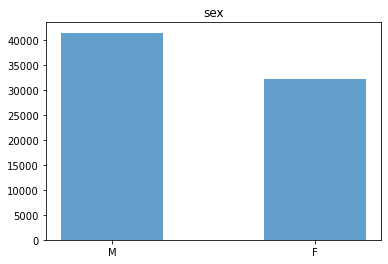

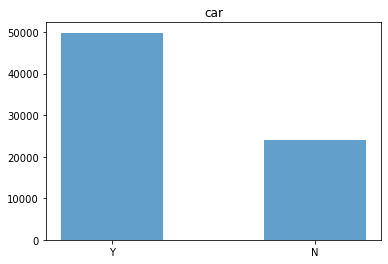

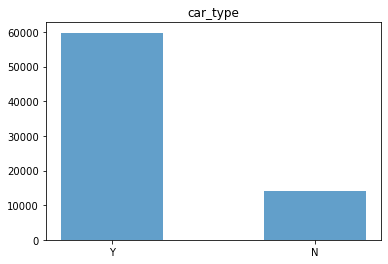

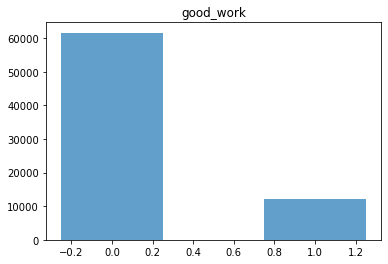

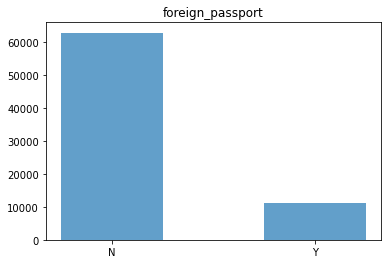

In [16]:
# Изобразим графики распределения категориальных и бинарных признаков

col_list = cat_features + bin_features

plt.figure()
for column in col_list:
    plt.bar(bank[bank['Train']==1][column].unique(), bank[bank['Train']==1][column].value_counts(), width=0.5, alpha=0.7)
    plt.title(column)
    plt.show()
    
# На основании графиков можно сделать следующие вывод:
# В признаке "education" сильно превалирует значение "SCH"
# В признаке "work_address" превалирует значение "2"
# В признаке "sna" превалирует значение "4"
# В признаке "first_time" превалирует значение "1"
# В бинарных признаках только "sex" распределен достаточно равномерно

# Выбросы

In [17]:
# Представим таблицу описания для оценки, что количество выбросов указано корректно
display(bank[bank['Train']==1][num_features].describe())

outlier_dic = {}

for column in num_features:
    perc25 = percentile(bank[column], 25)
    perc75 = percentile(bank[column], 75)
    iqr = perc75 - perc25
    low_range = perc25 - 1.5 * iqr
    upper_range = perc75 + 1.5 * iqr
    out_count = bank[bank['Train']==1][column].apply(lambda x: None if x < low_range or x > upper_range else x).isna().sum()
    outlier_dic[column] = [round(low_range, 2), round(upper_range, 2), out_count]

print('Результаты по выбросам:\n')
for key, val in outlier_dic.items():
    print(f'{key}: ниж.граница = {val[0]}, верх.граница = {val[1]}, кол-во выбросов = {val[2]}')

# По данным можно сделать следующие выводы:
# Признак "decline_app_cnt" имеет очень много выбросов, подумаем, нужно ли удалять:
#    Так как по распределению видно, что сильно преобладает занчение 0,
#    то удаление выбросов приведет к тому, что нужно будет удалить весь столбец.
# Признаки "score_bki", "bki_request_cnt", "income"  имеют мало выбросов, удалять не будем.
# Признак "region_rating" имеет очень много выбросов, подумаем, нужно ли удалять. 

,age,decline_app_cnt,score_bki,bki_request_cnt,region_rating,income,app_days_now
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,3.655332,0.152451,-1.904724,0.878014,56.725701,10.345886,87.964566
std,0.285077,0.362971,0.498231,0.657881,13.055717,0.697702,32.121884
min,3.091042,0.000000,-3.624586,0.000000,20.000000,6.908755,30.000000
25%,3.433987,0.000000,-2.259534,0.000000,50.000000,9.903538,60.000000
50%,3.637586,0.000000,-1.920823,0.693147,50.000000,10.308986,87.000000
75%,3.891820,0.000000,-1.569831,1.386294,60.000000,10.778977,116.000000
max,4.290459,3.526361,0.199773,3.988984,80.000000,13.815512,149.000000


Результаты по выбросам:

age: ниж.граница = 2.75, верх.граница = 4.58, кол-во выбросов = 0
decline_app_cnt: ниж.граница = 0.0, верх.граница = 0.0, кол-во выбросов = 12585
score_bki: ниж.граница = -3.3, верх.граница = -0.53, кол-во выбросов = 340
bki_request_cnt: ниж.граница = -2.08, верх.граница = 3.47, кол-во выбросов = 9
region_rating: ниж.граница = 35.0, верх.граница = 75.0, кол-во выбросов = 11975
income: ниж.граница = 8.59, верх.граница = 12.09, кол-во выбросов = 1767
app_days_now: ниж.граница = -24.0, верх.граница = 200.0, кол-во выбросов = 0


# Значимость переменных

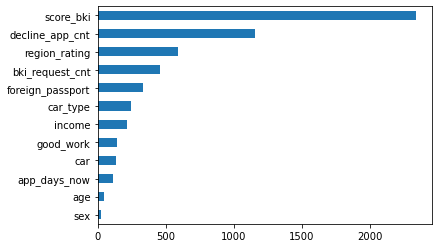

In [18]:
# Далее нам надо будет рассмотреть значимость числовы и бинарных переменных. 
# Для этого сделаем преобразование бинарных переменных.

label_encoder = LabelEncoder()

for column in bin_features:
    bank[column] = label_encoder.fit_transform(bank[column])

imp_num = pd.Series(f_classif(bank[bank['Train']==1][bin_features + num_features], 
                              bank[bank['Train']==1]['default'])[0], index=bin_features + num_features)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

# Мы видим, что самым значимым является признак "scoke_bki" (сильно важнее других), 
# далее идет "decline_app_cnt", "region_rating" и т.д., последним идет "sex".
# Учитывая значимость признаков "decline_app_cnt", "region_rating" и их данные по выбросам, выбросы удалять не будем.

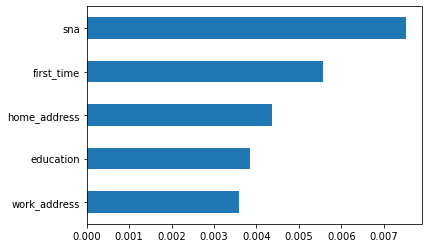

In [19]:
# Теперь рассмотрим значимость категориальных переменных

label_encoder = LabelEncoder()
bank['education'] = label_encoder.fit_transform(bank['education'])

imp_cat = pd.Series(mutual_info_classif(bank[bank['Train']==1][cat_features], 
                                        bank[bank['Train']==1]['default'], discrete_features = True), index=cat_features)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

# Мы видим, что самым значимым является признак "sna", а самым незначимым "work_address".


# Подготовка данных для модели

In [20]:
# Делим выборку обратно на тренировочную и тестовую
bank_train = bank[bank['Train']==1]
bank_test = bank[bank['Train']==0]

# Категориальные признаки преобразовываем
X_cat_train = pd.get_dummies(bank_train[cat_features], columns=cat_features).values
X_cat_test = pd.get_dummies(bank_test[cat_features], columns=cat_features).values

# Стандартизуем числовые признаки
X_num_train = StandardScaler().fit_transform(bank_train[num_features].values)
X_num_test = StandardScaler().fit_transform(bank_test[num_features].values)

# Бинарные признаки
X_bin_train = bank_train[bin_features].values
X_bin_test = bank_test[bin_features].values


# Объединяем данные
X = np.hstack([X_cat_train, X_num_train, X_bin_train])
Y = bank_train['default'].values
test_val = np.hstack([X_cat_test, X_num_test, X_bin_test])


# Регуляризация

In [21]:
# Далее будем использовать параметры регуляризации для улучшения модели
# Регуляризация. Подбор параметров

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_SEED, shuffle = True)

model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

penalty = ['l1', 'l2']
hyperparameters = dict(C=C, penalty=penalty)

clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(X_train, Y_train)

print('Лучший penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

Лучший penalty: l2
Лучшее C: 1.0


# Строим модель и прорисовываем ROC-кривую

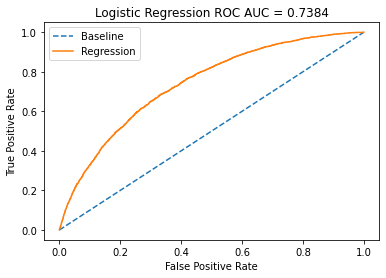

In [22]:
model = LogisticRegression(penalty='l2', C=1.0, max_iter=500)
model.fit(X_train, Y_train)
Y_pred = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc_val = roc_auc_score(Y_test, Y_pred)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(f'Logistic Regression ROC AUC = {roc_auc_val:.4f}')
plt.legend()
plt.show()

# Результат

In [23]:
model_submis = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
model_submis.fit(X, Y)
prob_submis = model_submis.predict_proba(test_val)[:,1]

submission = pd.DataFrame({'client_id': id_test, 'default': prob_submis})
submission.to_csv('submission.csv', index=False)

submission

,client_id,default
0,74835,0.038032
1,17527,0.354541
2,75683,0.060056
3,26883,0.092465
4,28862,0.027351
...,...,...
36344,83775,0.324698
36345,106254,0.016933
36346,81852,0.327616
36347,1971,0.213014
